In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})

%matplotlib inline

In [110]:
df = pd.read_csv('london.csv')
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [111]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [112]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [113]:
df.timestamp = pd.to_datetime(df.timestamp)

In [114]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [115]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


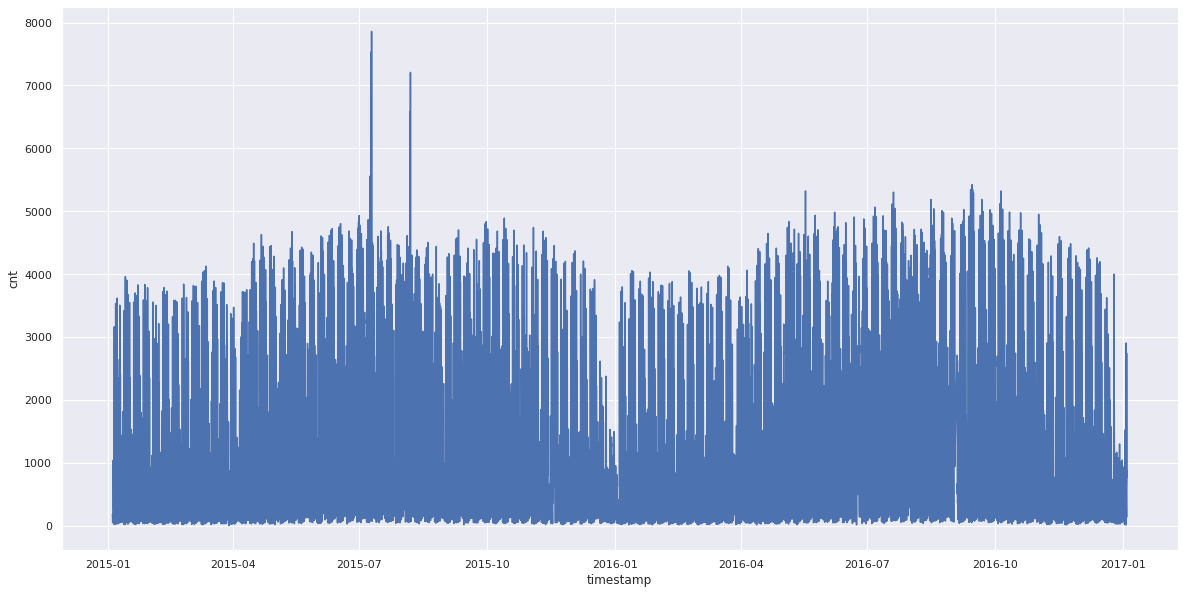

In [116]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.lineplot(df.timestamp,df.cnt)


In [117]:
df.timestamp = df.timestamp.sort_values()

In [118]:
df.set_index('timestamp', inplace=True)

In [119]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [120]:
dff = df.resample(rule='D').cnt.sum()
dff

timestamp
2015-01-04     9234
2015-01-05    20372
2015-01-06    20613
2015-01-07    21064
2015-01-08    15601
              ...  
2016-12-30    11566
2016-12-31    11424
2017-01-01     6421
2017-01-02    11823
2017-01-03    19436
Freq: D, Name: cnt, Length: 731, dtype: int64

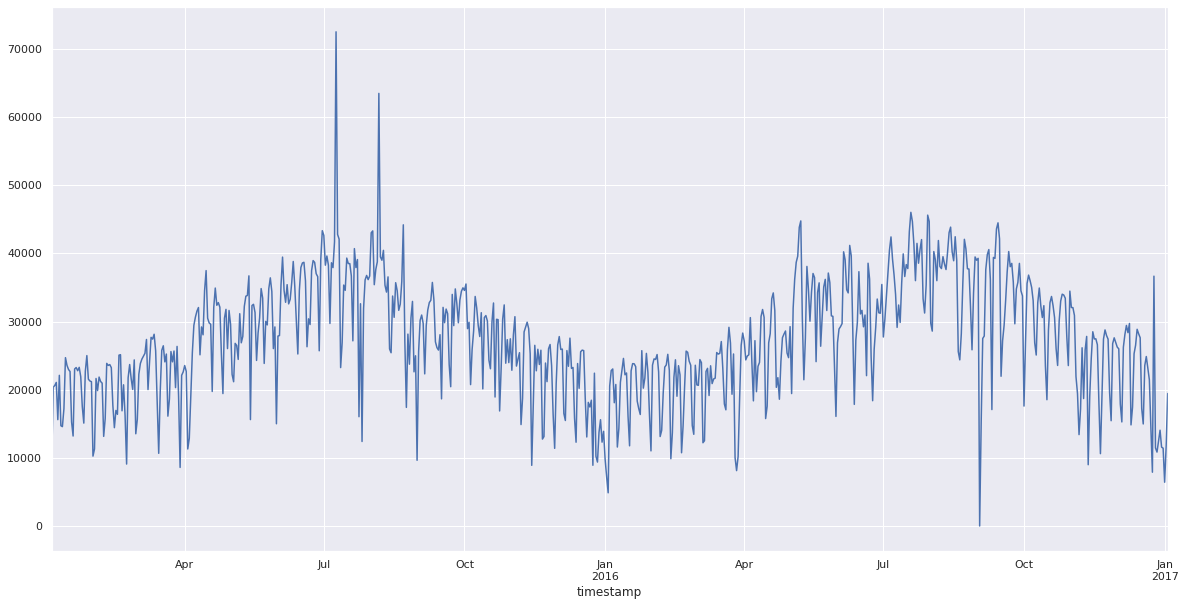

In [121]:
dff.plot()

In [122]:
dff = pd.DataFrame(dff)

In [123]:
dff['roll'] = dff.rolling(window=3).mean()

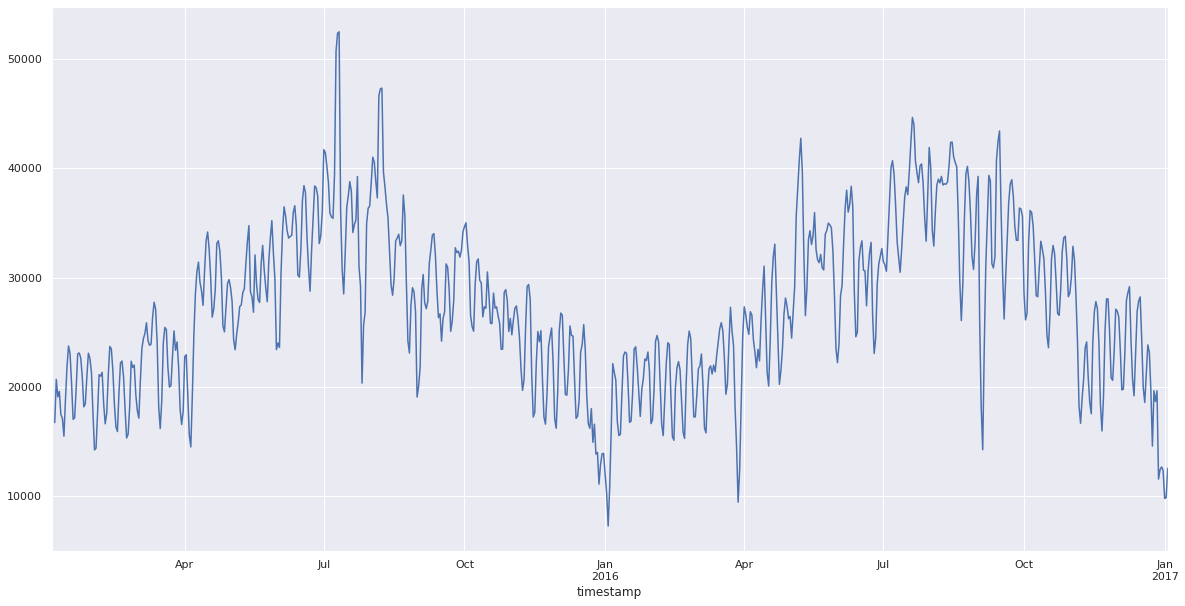

In [124]:
dff.roll.plot()

In [125]:
dff.roll['2015-07-09']

50705.0

In [126]:
dff

,cnt,roll
timestamp,,
2015-01-04,9234,NaN
2015-01-05,20372,NaN
2015-01-06,20613,16739.666667
2015-01-07,21064,20683.000000
2015-01-08,15601,19092.666667
...,...,...
2016-12-30,11566,12682.000000
2016-12-31,11424,12347.333333
2017-01-01,6421,9803.666667


In [128]:
dff['delta'] = dff.cnt - dff.roll
dff

,cnt,roll,delta
timestamp,,,
2015-01-04,9234,NaN,NaN
2015-01-05,20372,NaN,NaN
2015-01-06,20613,16739.666667,3873.333333
2015-01-07,21064,20683.000000,381.000000
2015-01-08,15601,19092.666667,-3491.666667
...,...,...,...
2016-12-30,11566,12682.000000,-1116.000000
2016-12-31,11424,12347.333333,-923.333333
2017-01-01,6421,9803.666667,-3382.666667


In [131]:
std = np.std(dff.delta)
std

4558.58664111794

In [132]:
dff['upper'] = dff.roll + std * 2.576
dff['lower'] = dff.roll - std * 2.576
dff

,cnt,roll,delta,upper,lower
timestamp,,,,,
2015-01-04,9234,NaN,NaN,NaN,NaN
2015-01-05,20372,NaN,NaN,NaN,NaN
2015-01-06,20613,16739.666667,3873.333333,28482.585854,4996.747479
2015-01-07,21064,20683.000000,381.000000,32425.919188,8940.080812
2015-01-08,15601,19092.666667,-3491.666667,30835.585854,7349.747479
...,...,...,...,...,...
2016-12-30,11566,12682.000000,-1116.000000,24424.919188,939.080812
2016-12-31,11424,12347.333333,-923.333333,24090.252521,604.414146
2017-01-01,6421,9803.666667,-3382.666667,21546.585854,-1939.252521


In [133]:
dff[dff.cnt > dff.upper]

,cnt,roll,delta,upper,lower
timestamp,,,,,
2015-07-09,72504,50705.000000,21799.000000,62447.919188,38962.080812
2015-08-06,63468,46627.333333,16840.666667,58370.252521,34884.414146
2016-09-04,27512,14259.000000,13253.000000,26001.919188,2516.080812
2016-12-25,36653,19650.666667,17002.333333,31393.585854,7907.747479


In [140]:
date = df[(df.index > '2015-07-09') & (df.index < '2015-07-10')]
date

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-07-09 01:00:00,212,15.5,15.5,59.0,14.0,1.0,0.0,0.0,1.0
2015-07-09 02:00:00,111,14.0,14.0,67.0,15.0,1.0,0.0,0.0,1.0
2015-07-09 03:00:00,81,14.0,14.0,63.0,18.5,1.0,0.0,0.0,1.0
2015-07-09 04:00:00,76,14.0,14.0,63.0,18.0,1.0,0.0,0.0,1.0
2015-07-09 05:00:00,269,13.0,13.0,67.0,17.0,1.0,0.0,0.0,1.0
2015-07-09 06:00:00,1724,13.0,13.0,67.0,16.0,1.0,0.0,0.0,1.0
2015-07-09 07:00:00,5309,13.5,13.5,65.0,17.0,1.0,0.0,0.0,1.0
2015-07-09 08:00:00,7531,14.5,14.5,61.0,19.0,2.0,0.0,0.0,1.0
2015-07-09 09:00:00,4832,15.0,15.0,59.0,16.0,2.0,0.0,0.0,1.0


In [141]:
date.wind_speed.unique()

array([14. , 15. , 18.5, 18. , 17. , 16. , 19. , 10. ,  8.5,  9. , 11. ,
       13. ,  7. ,  6.5, 12. ])

In [142]:
dff[dff.cnt < dff.lower]

,cnt,roll,delta,upper,lower
timestamp,,,,,
2015-05-14,15609,28709.333333,-13100.333333,40452.252521,16966.414146
2015-07-12,23240,36036.666667,-12796.666667,47779.585854,24293.747479
2015-07-24,16034,31013.666667,-14979.666667,42756.585854,19270.747479
2015-08-24,17400,29529.333333,-12129.333333,41272.252521,17786.414146
2015-11-14,8898,21037.333333,-12139.333333,32780.252521,9294.414146
2016-09-02,0,26086.333333,-26086.333333,37829.252521,14343.414146
2016-09-10,17080,31262.000000,-14182.000000,43004.919188,19519.080812
2016-09-16,21967,36193.333333,-14226.333333,47936.252521,24450.414146
2016-11-12,8990,20878.000000,-11888.000000,32620.919188,9135.080812


In [144]:
date1 = df[(df.index > '2016-09-01') & (df.index < '2016-09-03')]
date1

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2016-09-01 01:00:00,186,17.0,17.0,73.0,16.0,1.0,0.0,0.0,2.0
2016-09-01 02:00:00,89,16.5,16.5,75.0,16.0,1.0,0.0,0.0,2.0
2016-09-01 03:00:00,56,16.0,16.0,74.5,11.0,2.0,0.0,0.0,2.0
2016-09-01 04:00:00,64,16.0,16.0,77.0,12.0,2.0,0.0,0.0,2.0
2016-09-01 05:00:00,133,15.0,15.0,82.0,11.0,2.0,0.0,0.0,2.0
2016-09-01 06:00:00,811,15.0,15.0,82.0,12.0,2.0,0.0,0.0,2.0
2016-09-01 07:00:00,2663,16.0,16.0,77.0,11.0,2.0,0.0,0.0,2.0
2016-09-01 08:00:00,4631,16.5,16.5,75.0,9.0,2.0,0.0,0.0,2.0
2016-09-01 09:00:00,2365,18.0,18.0,68.0,6.5,2.0,0.0,0.0,2.0
